# 1. Reading, cleaning & splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config

# Set up display and output configuration
set_config(display="diagram")
set_config(transform_output="pandas")

# Load the housing dataset
url = "https://drive.google.com/file/d/1LUhQb29BhdiebuuVbo-DQT-y7izOcKul/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)


# Target and feature selection
X = data.drop(columns=["Expensive"])
y = data["Expensive"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Data explanation

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

CentralAir: Central air conditioning

       N	No
       Y	Yes

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace



# 2. Building the preprocessor

We have included all the code to create the preprocessing pipeline in a single cell for compactness.

In [ ]:
# 0. Set the config to view the preprocessor and get pandas dataframe output
set_config(display="diagram")
set_config(transform_output="pandas")

# 1. Define categorical & numerical columns in the Housing dataset
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# Define numerical columns
numeric_cols = X_num.columns

# Define ordinal columns with meaningful order and one-hot columns
ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "KitchenQual", "FireplaceQu"]
onehot_cols = ["MSZoning", "Condition1", "Heating", "Street", "CentralAir", "Foundation"]

# Manually define the order for each ordinal column
ordinal_categories = [
    ["Po", "Fa", "TA", "Gd", "Ex"],  # ExterQual
    ["Po", "Fa", "TA", "Gd", "Ex"],  # ExterCond
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # BsmtQual
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # BsmtCond
    ["NA", "No", "Mn", "Av", "Gd"],        # BsmtExposure
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],  # BsmtFinType1
    ["Po", "Fa", "TA", "Gd", "Ex"],  # KitchenQual
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"]   # FireplaceQu
]

# 2. Numerical pipeline: imputes missing values
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean")
)

# 3. Categorical pipeline
# 3.1 Define the categorical encoder with ordinal and one-hot encoding
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),
    ]
)

# 3.2 Categorical pipeline with imputation for missing values and categorical encoding
categorical_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    categorical_encoder
)

# 4. Full preprocessing pipeline: combines numerical and categorical pipelines
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, numeric_cols),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

# Display the full preprocessing structure
full_preprocessing


ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('columntransfo...
                                                                                    'FireplaceQu']),
                                                                                  ('cat_onehot',
                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                 sparse_output=False),
                                                                                   ['MSZoning',
                                                                                    'Condition1',
                                                                                    'Heating',
                                                                                    'Street',
                                                                                    'CentralAir',
                                                                                    'Foundation'])]))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])

# 3. Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV


# Full pipeline with preprocessing and model
full_pipeline = make_pipeline(full_preprocessing, DecisionTreeClassifier())

# Define the parameter grid, referencing the correct structure
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],  # Adjusted to match full_pipeline hierarchy
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# Set up GridSearchCV with the pipeline and parameter grid
search = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1)

# Fit the GridSearchCV to find the best model
search.fit(X_train, y_train)

# Store the best score for the Decision Tree
scores = {"dtree": search.best_score_}

# Print results
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation Score:", round(scores["dtree"], 4))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 9}
Best Cross-Validation Score: 0.9136


# 4. Error analysis

In [ ]:
accuracy_score(search.predict(X_test), y_test)

0.910958904109589

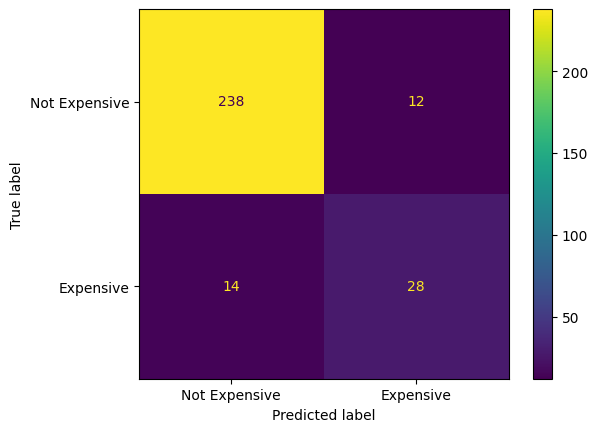

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Expensive', 'Expensive']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive', 'Expensive']);

# 5. KNN - - K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  KNeighborsClassifier()
                                 )

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50, 2),
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "standardscaler__with_std":[True, False]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

scores["knn"] = knn_search.best_score_

scores

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'dtree': 0.9135541616228313, 'knn': 0.9280730714207109}

In [ ]:
knn_search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'kneighborsclassifier__n_neighbors': 12,
 'kneighborsclassifier__weights': 'distance',
 'standardscaler__with_std': True}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid for GridSearchCV, updating paths to match exact pipeline component names
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],  # Imputer strategy in numeric pipeline
    "decisiontreeclassifier__max_depth": range(2, 14, 2),                          # Depth of the tree
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)                    # Min samples per leaf
}

# Define GridSearchCV with cross-validation
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

# Fit GridSearchCV on the training data
search.fit(X_train, y_train)

# Get the best parameters and display them
best_param = search.best_params_
print("Best Parameters:", best_param)

# Calculate training accuracy using the best estimator from GridSearchCV
train_accuracy = accuracy_score(y_train, search.predict(X_train))
print("Training Accuracy:", round(train_accuracy,2))

# Calculate test accuracy using the best estimator from GridSearchCV
test_accuracy = accuracy_score(y_test, search.predict(X_test))
print("Test Accuracy:", round(test_accuracy,2))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 9}
Training Accuracy: 0.93
Test Accuracy: 0.91


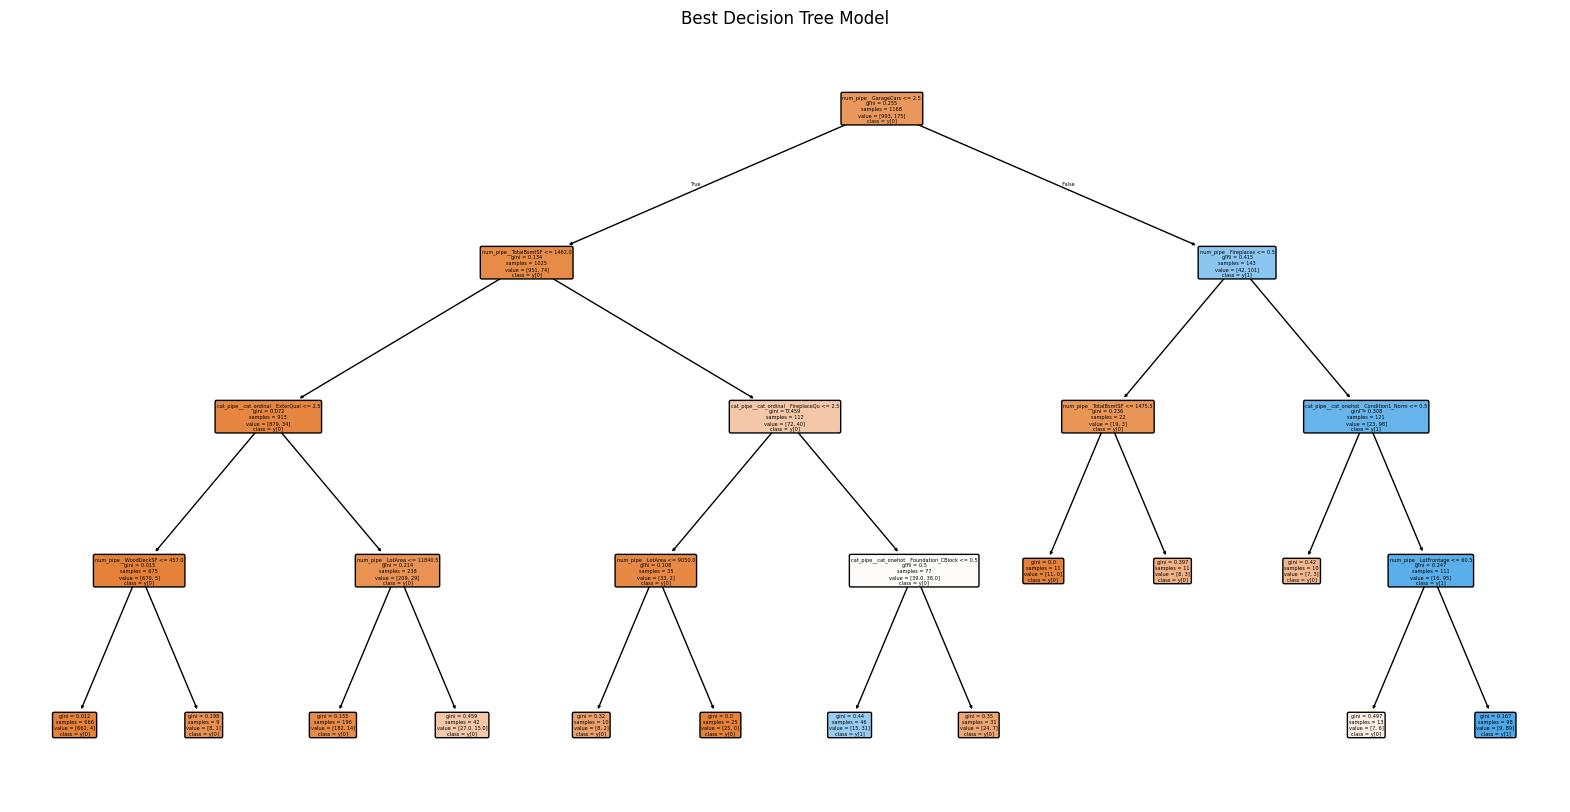

In [ ]:
# Get transformed feature names by fitting the preprocessor to X_train
preprocessor = search.best_estimator_.named_steps['columntransformer']
X_transformed = preprocessor.transform(X_train)
feature_names = X_transformed.columns  # Extract the feature names post-transformation

# Visualize the best decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_tree = search.best_estimator_.named_steps['decisiontreeclassifier']

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=feature_names, class_names=True, filled=True, rounded=True)
plt.title("Best Decision Tree Model")
plt.show()